<h1 style="color:blue;">MOVIE RATING PREDICTION WITH PYTHON</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Loading dataset</h3>

In [2]:
df=pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')
df 

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Understanding dataset</h3>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [5]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


<h3>Preprocessing the data</h3>

<h4>Handling missing value</h4>

In [6]:
df['Name']=df['Name'].replace(' ','Unknown')
df['Name']

0                                   Unknown
1        #Gadhvi (He thought he was Gandhi)
2                               #Homecoming
3                                   #Yaaram
4                         ...And Once Again
                        ...                
15504                   Zulm Ko Jala Doonga
15505                                 Zulmi
15506                             Zulmi Raj
15507                         Zulmi Shikari
15508                          Zulm-O-Sitam
Name: Name, Length: 15509, dtype: object

In [7]:
df.dropna(subset=['Year'], inplace=True,ignore_index=True)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
4,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
14976,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
14977,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
14978,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
14979,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

Name           0
Year           0
Duration    7866
Genre       1841
Rating      7062
Votes       7061
Director     497
Actor 1     1488
Actor 2     2197
Actor 3     2907
dtype: int64

In [9]:
s = pd.Series(dtype='int')

for idx, val in df['Duration'].items():
    if pd.isna(val):
        continue
    j = val.split()
    s.loc[idx] = int(j[0])  # Use the same index from df
s


0        109
1         90
2        110
3        105
4        147
        ... 
14965    115
14966    153
14975    125
14977    129
14980    130
Length: 7115, dtype: int64

In [10]:
df['Duration'] = s
df

df['Duration']=df['Duration'].fillna(df['Duration'].mean())
df['Duration']

0        109.000000
1         90.000000
2        110.000000
3        105.000000
4        147.000000
            ...    
14976    128.467604
14977    129.000000
14978    128.467604
14979    128.467604
14980    130.000000
Name: Duration, Length: 14981, dtype: float64

In [11]:
df['Duration'].isnull().sum()

df.isnull().sum()

Name           0
Year           0
Duration       0
Genre       1841
Rating      7062
Votes       7061
Director     497
Actor 1     1488
Actor 2     2197
Actor 3     2907
dtype: int64

In [12]:
df['Genre'].mode()


0    Drama
Name: Genre, dtype: object

In [13]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),(2019),109.000000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Homecoming,(2021),90.000000,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Yaaram,(2019),110.000000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,...And Once Again,(2010),105.000000,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
4,...Aur Pyaar Ho Gaya,(1997),147.000000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
14976,Zulm Ko Jala Doonga,(1988),128.467604,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
14977,Zulmi,(1999),129.000000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
14978,Zulmi Raj,(2005),128.467604,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
14979,Zulmi Shikari,(1988),128.467604,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df['Rating']=df['Rating'].fillna(df['Rating'].mean())

In [15]:
for k in df['Votes'].values:
    if k=='$5.16M' :
        print("yes")


yes


In [16]:
df.loc[:, 'Votes'] = df['Votes'].fillna(0)
df.loc[:, 'Votes'] = df['Votes'].astype(str).str.replace(',', '', regex=False)
df = df[df['Votes'] != '$5.16M']
df.reset_index(drop=True, inplace=True)


In [17]:
df.loc[:, 'Votes']=df['Votes'].astype('float64')
df['Votes']=df['Votes'].fillna(df['Votes'].median())

/tmp/ipykernel_8757/1591521550.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Votes']=df['Votes'].fillna(df['Votes'].median())
/tmp/ipykernel_8757/1591521550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Votes']=df['Votes'].fillna(df['Votes'].median())


In [18]:
df.loc[:, 'Director']=df['Director'].fillna('Unknown')

In [19]:
df.loc[:, 'Actor 1']=df['Actor 1'].fillna('Unknown')

In [20]:
df.loc[:,'Actor 2']=df['Actor 2'].fillna('Unknown')

In [21]:
df.loc[:,'Actor 3']=df['Actor 3'].fillna('Unknown')

In [22]:
df.loc[:,'Genre']=df['Genre'].fillna(df['Genre'].mode()[0])

In [23]:
df['Genre'].isnull().sum()

0

In [24]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [25]:
top_directors = df['Director'].value_counts().nlargest(11).index
top_directors

Index(['Unknown', 'Jayant Desai', 'Kanti Shah', 'Babubhai Mistry',
       'Mahesh Bhatt', 'Master Bhagwan', 'Nanabhai Bhatt', 'Dhirubhai Desai',
       'Mohammed Hussain', 'B.R. Ishara', 'David Dhawan'],
      dtype='object', name='Director')

In [26]:
top_directors = top_directors[top_directors != 'Unknown']
top_directors 

Index(['Jayant Desai', 'Kanti Shah', 'Babubhai Mistry', 'Mahesh Bhatt',
       'Master Bhagwan', 'Nanabhai Bhatt', 'Dhirubhai Desai',
       'Mohammed Hussain', 'B.R. Ishara', 'David Dhawan'],
      dtype='object', name='Director')

In [27]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),(2019),109.000000,Drama,7.000000,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Homecoming,(2021),90.000000,"Drama, Musical",5.841621,0.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Yaaram,(2019),110.000000,"Comedy, Romance",4.400000,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,...And Once Again,(2010),105.000000,Drama,5.841621,0.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
4,...Aur Pyaar Ho Gaya,(1997),147.000000,"Comedy, Drama, Musical",4.700000,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
14975,Zulm Ko Jala Doonga,(1988),128.467604,Action,4.600000,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
14976,Zulmi,(1999),129.000000,"Action, Drama",4.500000,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
14977,Zulmi Raj,(2005),128.467604,Action,5.841621,0.0,Kiran Thej,Sangeeta Tiwari,Unknown,Unknown
14978,Zulmi Shikari,(1988),128.467604,Action,5.841621,0.0,Unknown,Unknown,Unknown,Unknown


<h4>Converting categorical to numeric data</h4>

In [28]:
df.loc[:,'DirectorScore'] = df['Director'].apply(lambda x: 'high' if x in top_directors else 'low')
df['DirectorScore']
df

/tmp/ipykernel_8757/4269983436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'DirectorScore'] = df['Director'].apply(lambda x: 'high' if x in top_directors else 'low')


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,DirectorScore
0,#Gadhvi (He thought he was Gandhi),(2019),109.000000,Drama,7.000000,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,low
1,#Homecoming,(2021),90.000000,"Drama, Musical",5.841621,0.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,low
2,#Yaaram,(2019),110.000000,"Comedy, Romance",4.400000,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,low
3,...And Once Again,(2010),105.000000,Drama,5.841621,0.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,low
4,...Aur Pyaar Ho Gaya,(1997),147.000000,"Comedy, Drama, Musical",4.700000,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,low
...,...,...,...,...,...,...,...,...,...,...,...
14975,Zulm Ko Jala Doonga,(1988),128.467604,Action,4.600000,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,low
14976,Zulmi,(1999),129.000000,"Action, Drama",4.500000,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,low
14977,Zulmi Raj,(2005),128.467604,Action,5.841621,0.0,Kiran Thej,Sangeeta Tiwari,Unknown,Unknown,low
14978,Zulmi Shikari,(1988),128.467604,Action,5.841621,0.0,Unknown,Unknown,Unknown,Unknown,low


In [29]:
all_actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])
top_actors = all_actors.value_counts().nlargest(11).index
top_actors = top_actors[top_actors != 'Unknown']
top_actors
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,DirectorScore
0,#Gadhvi (He thought he was Gandhi),(2019),109.000000,Drama,7.000000,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,low
1,#Homecoming,(2021),90.000000,"Drama, Musical",5.841621,0.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,low
2,#Yaaram,(2019),110.000000,"Comedy, Romance",4.400000,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,low
3,...And Once Again,(2010),105.000000,Drama,5.841621,0.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,low
4,...Aur Pyaar Ho Gaya,(1997),147.000000,"Comedy, Drama, Musical",4.700000,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,low
...,...,...,...,...,...,...,...,...,...,...,...
14975,Zulm Ko Jala Doonga,(1988),128.467604,Action,4.600000,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,low
14976,Zulmi,(1999),129.000000,"Action, Drama",4.500000,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,low
14977,Zulmi Raj,(2005),128.467604,Action,5.841621,0.0,Kiran Thej,Sangeeta Tiwari,Unknown,Unknown,low
14978,Zulmi Shikari,(1988),128.467604,Action,5.841621,0.0,Unknown,Unknown,Unknown,Unknown,low


In [30]:
df.loc[:,'actorScore1'] = df['Actor 1'].apply(lambda x: 'Top_Star' if x in top_actors else 'Not_Top_Star')
df.loc[:,'actorScore2'] = df['Actor 2'].apply(lambda x: 'Top_Star' if x in top_actors else 'Not_Top_Star')
df.loc[:,'actorScore3'] = df['Actor 3'].apply(lambda x: 'Top_Star' if x in top_actors else 'Not_Top_Star')
df

/tmp/ipykernel_8757/863244867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'actorScore1'] = df['Actor 1'].apply(lambda x: 'Top_Star' if x in top_actors else 'Not_Top_Star')
/tmp/ipykernel_8757/863244867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'actorScore2'] = df['Actor 2'].apply(lambda x: 'Top_Star' if x in top_actors else 'Not_Top_Star')
/tmp/ipykernel_8757/863244867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,DirectorScore,actorScore1,actorScore2,actorScore3
0,#Gadhvi (He thought he was Gandhi),(2019),109.000000,Drama,7.000000,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
1,#Homecoming,(2021),90.000000,"Drama, Musical",5.841621,0.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
2,#Yaaram,(2019),110.000000,"Comedy, Romance",4.400000,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
3,...And Once Again,(2010),105.000000,Drama,5.841621,0.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
4,...Aur Pyaar Ho Gaya,(1997),147.000000,"Comedy, Drama, Musical",4.700000,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,Zulm Ko Jala Doonga,(1988),128.467604,Action,4.600000,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
14976,Zulmi,(1999),129.000000,"Action, Drama",4.500000,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
14977,Zulmi Raj,(2005),128.467604,Action,5.841621,0.0,Kiran Thej,Sangeeta Tiwari,Unknown,Unknown,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
14978,Zulmi Shikari,(1988),128.467604,Action,5.841621,0.0,Unknown,Unknown,Unknown,Unknown,low,Not_Top_Star,Not_Top_Star,Not_Top_Star


In [31]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,DirectorScore,actorScore1,actorScore2,actorScore3
0,#Gadhvi (He thought he was Gandhi),(2019),109.000000,Drama,7.000000,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
1,#Homecoming,(2021),90.000000,"Drama, Musical",5.841621,0.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
2,#Yaaram,(2019),110.000000,"Comedy, Romance",4.400000,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
3,...And Once Again,(2010),105.000000,Drama,5.841621,0.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
4,...Aur Pyaar Ho Gaya,(1997),147.000000,"Comedy, Drama, Musical",4.700000,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,Zulm Ko Jala Doonga,(1988),128.467604,Action,4.600000,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
14976,Zulmi,(1999),129.000000,"Action, Drama",4.500000,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
14977,Zulmi Raj,(2005),128.467604,Action,5.841621,0.0,Kiran Thej,Sangeeta Tiwari,Unknown,Unknown,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
14978,Zulmi Shikari,(1988),128.467604,Action,5.841621,0.0,Unknown,Unknown,Unknown,Unknown,low,Not_Top_Star,Not_Top_Star,Not_Top_Star


In [32]:
df.Year

0        (2019)
1        (2021)
2        (2019)
3        (2010)
4        (1997)
          ...  
14975    (1988)
14976    (1999)
14977    (2005)
14978    (1988)
14979    (1998)
Name: Year, Length: 14980, dtype: object

In [34]:
dfyear=pd.Series(dtype='int64')
for index,a in df.Year.items():
    year=''
    for b in a:
        if b =='(' or b==')':
            continue
        year+=b
    dfyear.loc[index]=int(year)
dfyear

0        2019
1        2021
2        2019
3        2010
4        1997
         ... 
14975    1988
14976    1999
14977    2005
14978    1988
14979    1998
Length: 14980, dtype: int64

In [35]:
df.Year=dfyear
df

/tmp/ipykernel_8757/1410373701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Year=dfyear


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,DirectorScore,actorScore1,actorScore2,actorScore3
0,#Gadhvi (He thought he was Gandhi),2019,109.000000,Drama,7.000000,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
1,#Homecoming,2021,90.000000,"Drama, Musical",5.841621,0.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
2,#Yaaram,2019,110.000000,"Comedy, Romance",4.400000,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
3,...And Once Again,2010,105.000000,Drama,5.841621,0.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
4,...Aur Pyaar Ho Gaya,1997,147.000000,"Comedy, Drama, Musical",4.700000,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,Zulm Ko Jala Doonga,1988,128.467604,Action,4.600000,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
14976,Zulmi,1999,129.000000,"Action, Drama",4.500000,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
14977,Zulmi Raj,2005,128.467604,Action,5.841621,0.0,Kiran Thej,Sangeeta Tiwari,Unknown,Unknown,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
14978,Zulmi Shikari,1988,128.467604,Action,5.841621,0.0,Unknown,Unknown,Unknown,Unknown,low,Not_Top_Star,Not_Top_Star,Not_Top_Star


In [36]:
new_df=df.drop(columns=['Name','Director','Actor 1','Actor 2','Actor 3'])
new_df

,Year,Duration,Genre,Rating,Votes,DirectorScore,actorScore1,actorScore2,actorScore3
0,2019,109.000000,Drama,7.000000,8.0,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
1,2021,90.000000,"Drama, Musical",5.841621,0.0,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
2,2019,110.000000,"Comedy, Romance",4.400000,35.0,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
3,2010,105.000000,Drama,5.841621,0.0,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
4,1997,147.000000,"Comedy, Drama, Musical",4.700000,827.0,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
...,...,...,...,...,...,...,...,...,...
14975,1988,128.467604,Action,4.600000,11.0,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
14976,1999,129.000000,"Action, Drama",4.500000,655.0,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
14977,2005,128.467604,Action,5.841621,0.0,low,Not_Top_Star,Not_Top_Star,Not_Top_Star
14978,1988,128.467604,Action,5.841621,0.0,low,Not_Top_Star,Not_Top_Star,Not_Top_Star


In [37]:
new_df = pd.get_dummies(new_df, columns=['actorScore1', 'actorScore2', 'actorScore3','DirectorScore'])
new_df

,Year,Duration,Genre,Rating,Votes,actorScore1_Not_Top_Star,actorScore1_Top_Star,actorScore2_Not_Top_Star,actorScore2_Top_Star,actorScore3_Not_Top_Star,actorScore3_Top_Star,DirectorScore_high,DirectorScore_low
0,2019,109.000000,Drama,7.000000,8.0,True,False,True,False,True,False,False,True
1,2021,90.000000,"Drama, Musical",5.841621,0.0,True,False,True,False,True,False,False,True
2,2019,110.000000,"Comedy, Romance",4.400000,35.0,True,False,True,False,True,False,False,True
3,2010,105.000000,Drama,5.841621,0.0,True,False,True,False,True,False,False,True
4,1997,147.000000,"Comedy, Drama, Musical",4.700000,827.0,True,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,1988,128.467604,Action,4.600000,11.0,True,False,True,False,True,False,False,True
14976,1999,129.000000,"Action, Drama",4.500000,655.0,True,False,True,False,True,False,False,True
14977,2005,128.467604,Action,5.841621,0.0,True,False,True,False,True,False,False,True
14978,1988,128.467604,Action,5.841621,0.0,True,False,True,False,True,False,False,True


In [38]:
new_df=new_df.drop(columns=['actorScore1_Not_Top_Star','actorScore2_Not_Top_Star','actorScore3_Not_Top_Star','DirectorScore_low'])  

In [39]:
new_df


,Year,Duration,Genre,Rating,Votes,actorScore1_Top_Star,actorScore2_Top_Star,actorScore3_Top_Star,DirectorScore_high
0,2019,109.000000,Drama,7.000000,8.0,False,False,False,False
1,2021,90.000000,"Drama, Musical",5.841621,0.0,False,False,False,False
2,2019,110.000000,"Comedy, Romance",4.400000,35.0,False,False,False,False
3,2010,105.000000,Drama,5.841621,0.0,False,False,False,False
4,1997,147.000000,"Comedy, Drama, Musical",4.700000,827.0,False,False,False,False
...,...,...,...,...,...,...,...,...,...
14975,1988,128.467604,Action,4.600000,11.0,False,False,False,False
14976,1999,129.000000,"Action, Drama",4.500000,655.0,False,False,False,False
14977,2005,128.467604,Action,5.841621,0.0,False,False,False,False
14978,1988,128.467604,Action,5.841621,0.0,False,False,False,False


In [40]:
new_df['Genre'] = new_df['Genre'].apply(lambda x: [g.strip() for g in x.split(',')])
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_dummies = pd.DataFrame(mlb.fit_transform(new_df['Genre']), columns=mlb.classes_)
new_df = pd.concat([new_df, genre_dummies], axis=1)
new_df

,Year,Duration,Genre,Rating,Votes,actorScore1_Top_Star,actorScore2_Top_Star,actorScore3_Top_Star,DirectorScore_high,Action,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,2019,109.000000,[Drama],7.000000,8.0,False,False,False,False,0,...,0,0,0,0,0,0,0,0,0,0
1,2021,90.000000,"[Drama, Musical]",5.841621,0.0,False,False,False,False,0,...,0,0,0,0,0,0,0,0,0,0
2,2019,110.000000,"[Comedy, Romance]",4.400000,35.0,False,False,False,False,0,...,0,0,0,1,0,0,0,0,0,0
3,2010,105.000000,[Drama],5.841621,0.0,False,False,False,False,0,...,0,0,0,0,0,0,0,0,0,0
4,1997,147.000000,"[Comedy, Drama, Musical]",4.700000,827.0,False,False,False,False,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,1988,128.467604,[Action],4.600000,11.0,False,False,False,False,1,...,0,0,0,0,0,0,0,0,0,0
14976,1999,129.000000,"[Action, Drama]",4.500000,655.0,False,False,False,False,1,...,0,0,0,0,0,0,0,0,0,0
14977,2005,128.467604,[Action],5.841621,0.0,False,False,False,False,1,...,0,0,0,0,0,0,0,0,0,0
14978,1988,128.467604,[Action],5.841621,0.0,False,False,False,False,1,...,0,0,0,0,0,0,0,0,0,0


In [41]:
new_df.shape

(14980, 33)

In [42]:
new_df=new_df.drop(columns=['Genre'])   
new_df

,Year,Duration,Rating,Votes,actorScore1_Top_Star,actorScore2_Top_Star,actorScore3_Top_Star,DirectorScore_high,Action,Adventure,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,2019,109.000000,7.000000,8.0,False,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021,90.000000,5.841621,0.0,False,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019,110.000000,4.400000,35.0,False,False,False,False,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2010,105.000000,5.841621,0.0,False,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1997,147.000000,4.700000,827.0,False,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,1988,128.467604,4.600000,11.0,False,False,False,False,1,0,...,0,0,0,0,0,0,0,0,0,0
14976,1999,129.000000,4.500000,655.0,False,False,False,False,1,0,...,0,0,0,0,0,0,0,0,0,0
14977,2005,128.467604,5.841621,0.0,False,False,False,False,1,0,...,0,0,0,0,0,0,0,0,0,0
14978,1988,128.467604,5.841621,0.0,False,False,False,False,1,0,...,0,0,0,0,0,0,0,0,0,0


<h3>visualization of  dataset</h3>

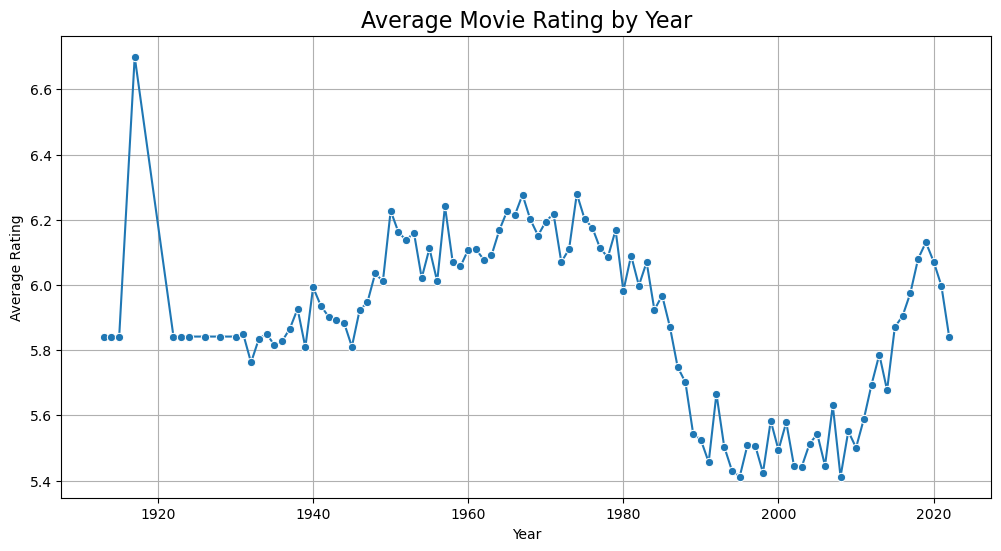

In [43]:
yearly_ratings = df.groupby('Year')['Rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_ratings, x='Year', y='Rating', marker='o')
plt.title('Average Movie Rating by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)

In [44]:
df_single_genre = df[~df['Genre'].str.contains(',')]
avg_rating = df_single_genre.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
avg_rating

Genre
Documentary    6.402075
Sci-Fi         6.283320
History        6.114910
Family         6.013467
Drama          5.979069
Biography      5.973489
Animation      5.969767
Fantasy        5.953735
Music          5.848919
Reality-TV     5.841621
Sport          5.832372
Mystery        5.821483
Comedy         5.762241
Thriller       5.742585
Romance        5.733872
Musical        5.688957
Action         5.594700
Adventure      5.536518
Crime          5.467790
Horror         5.321323
War            4.936649
Name: Rating, dtype: float64

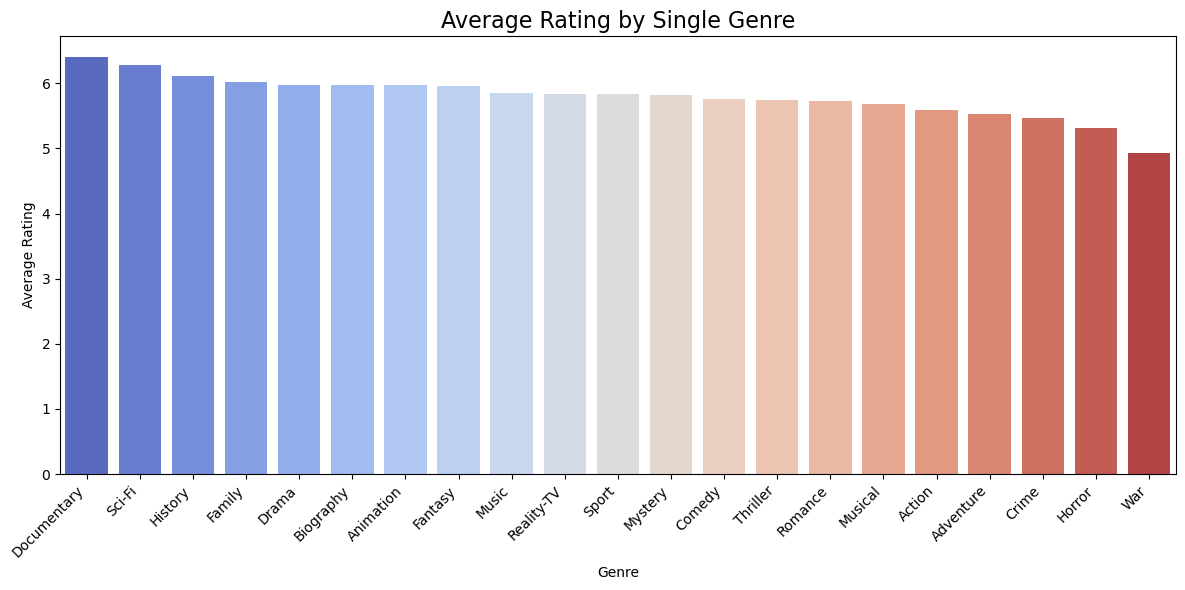

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating.index, y=avg_rating.values, hue=avg_rating.index, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Average Rating by Single Genre', fontsize=16)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

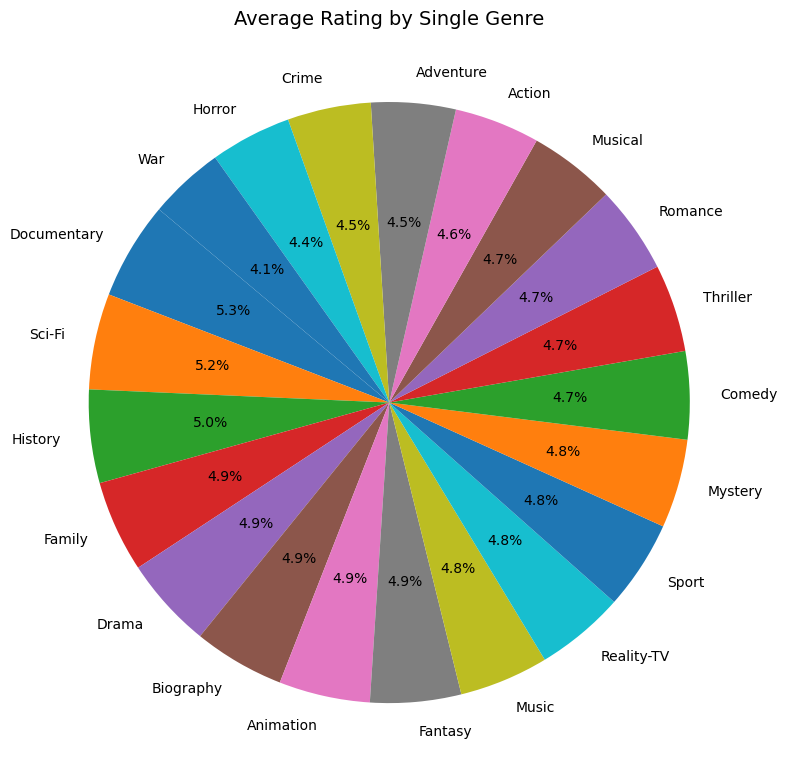

In [46]:
plt.figure(figsize=(8, 8))
plt.pie(avg_rating.values, labels=avg_rating.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Rating by Single Genre', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [47]:
movie_ratings = df.groupby('Name')['Rating'].mean().sort_values(ascending=False)
top_movie_ratings=movie_ratings[:10]
top_movie_ratings

Name
Love Qubool Hai        10.0
Half Songs              9.7
Breed                   9.6
The Reluctant Crime     9.4
Ram-Path                9.4
June                    9.4
Gho Gho Rani            9.4
God of gods             9.3
Love Sorries            9.3
Refl3ct                 9.3
Name: Rating, dtype: float64

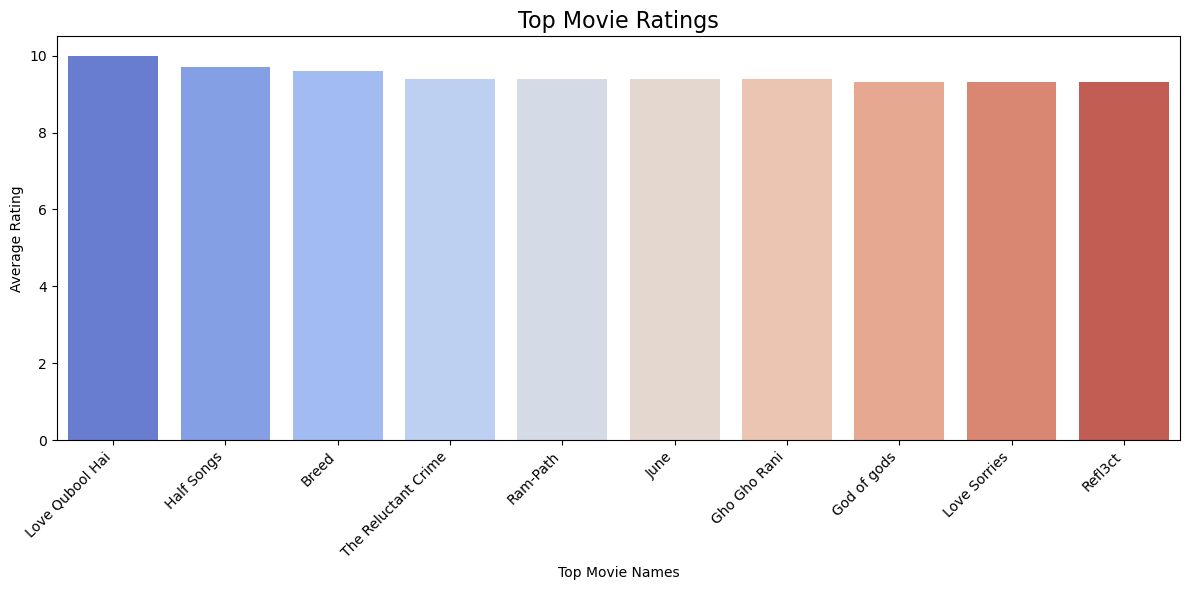

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_movie_ratings.index, y=top_movie_ratings.values,hue=top_movie_ratings.index, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Top Movie Ratings', fontsize=16)
plt.xlabel('Top Movie Names')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

In [49]:
top_directors_counts =df['Director'] .value_counts()
top_directors_counts = top_directors_counts[1:11]
top_directors_counts


Director
Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
Nanabhai Bhatt      46
Dhirubhai Desai     46
Mohammed Hussain    44
B.R. Ishara         44
David Dhawan        43
Name: count, dtype: int64

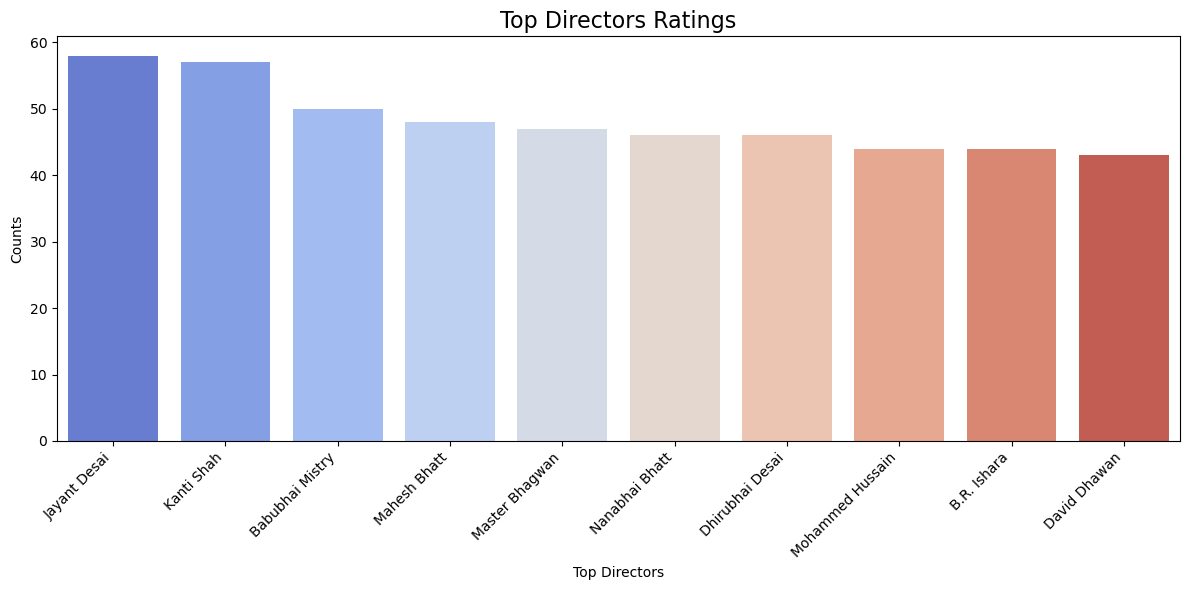

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors_counts.index, y=top_directors_counts.values,hue=top_directors_counts.index, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Top Directors Ratings', fontsize=16)
plt.xlabel('Top Directors')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

In [51]:
top_actors_counts =all_actors.value_counts()
top_actors_counts = top_actors_counts[1:11]
top_actors_counts

Mithun Chakraborty    240
Dharmendra            230
Ashok Kumar           227
Jeetendra             179
Amitabh Bachchan      176
Rekha                 142
Rajesh Khanna         139
Shashi Kapoor         133
Master Bhagwan        130
Shatrughan Sinha      130
Name: count, dtype: int64

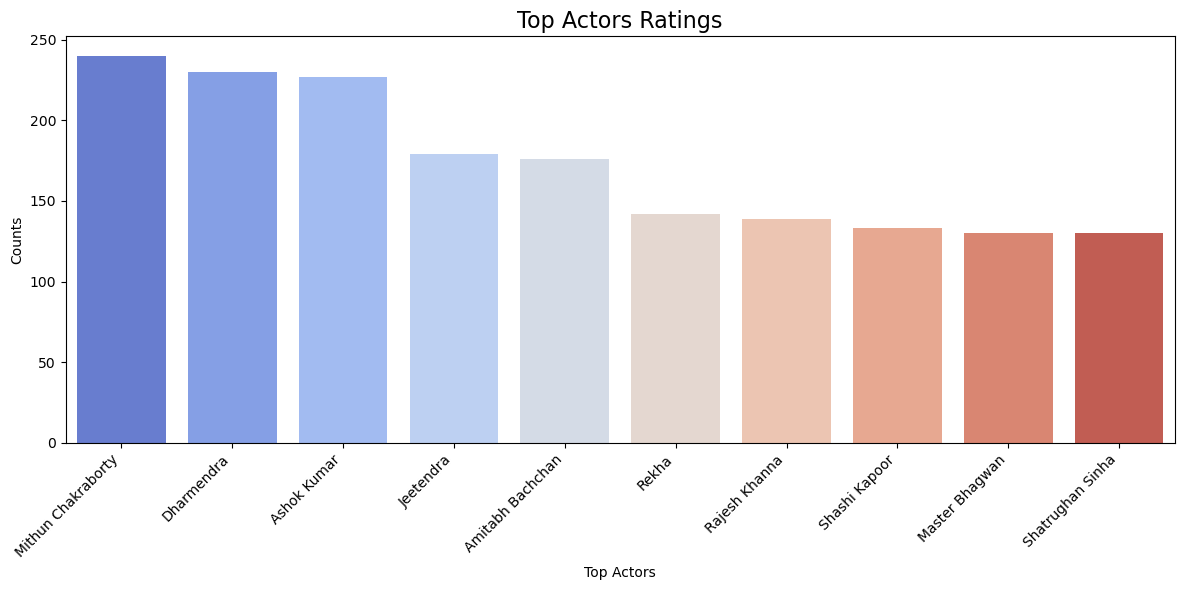

In [52]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors_counts.index, y=top_actors_counts.values, hue=top_actors_counts.index,palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Top Actors Ratings', fontsize=16)
plt.xlabel('Top Actors')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

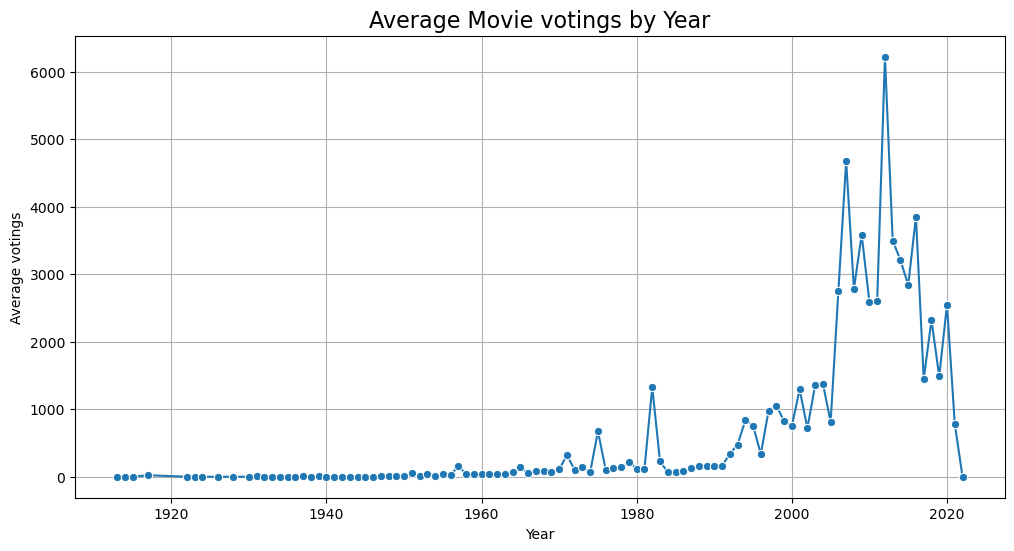

In [53]:
yearly_votings = df.groupby('Year')['Votes'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_votings, x='Year', y='Votes', marker='o')
plt.title('Average Movie votings by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average votings')
plt.grid(True)

<h4>Spliting data into train and test dataset</h4>

In [54]:
x=new_df.drop(columns=['Rating'])
x

,Year,Duration,Votes,actorScore1_Top_Star,actorScore2_Top_Star,actorScore3_Top_Star,DirectorScore_high,Action,Adventure,Animation,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,2019,109.000000,8.0,False,False,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021,90.000000,0.0,False,False,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019,110.000000,35.0,False,False,False,False,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2010,105.000000,0.0,False,False,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1997,147.000000,827.0,False,False,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,1988,128.467604,11.0,False,False,False,False,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14976,1999,129.000000,655.0,False,False,False,False,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14977,2005,128.467604,0.0,False,False,False,False,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14978,1988,128.467604,0.0,False,False,False,False,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
y=new_df.Rating
y

0        7.000000
1        5.841621
2        4.400000
3        5.841621
4        4.700000
           ...   
14975    4.600000
14976    4.500000
14977    5.841621
14978    5.841621
14979    6.200000
Name: Rating, Length: 14980, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=23)

<h3>Model training</h3>

<h4>Random Forest Regressor</h4>

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
model=RandomForestRegressor(n_estimators=200,
    max_depth=100, )

In [59]:
model.fit(xtest,ytest)

RandomForestRegressor(max_depth=100, n_estimators=200)

<h4>Rating Prediction</h4>

In [60]:
model.predict(xtest)

array([4.37583243, 4.95220811, 4.94420811, ..., 3.5695    , 5.84162142,
       6.217     ])

In [61]:
ytest

11439    4.300000
491      4.500000
2044     4.400000
2222     5.841621
1989     5.841621
           ...   
1370     6.200000
6232     5.841621
12441    3.200000
5434     5.841621
9944     5.800000
Name: Rating, Length: 2996, dtype: float64

In [66]:
ypred=model.predict(xtest)
ypred

array([4.37583243, 4.95220811, 4.94420811, ..., 3.5695    , 5.84162142,
       6.217     ])

<h3>Heatmap of Actual vs Predicted Binned Ratings</h3>

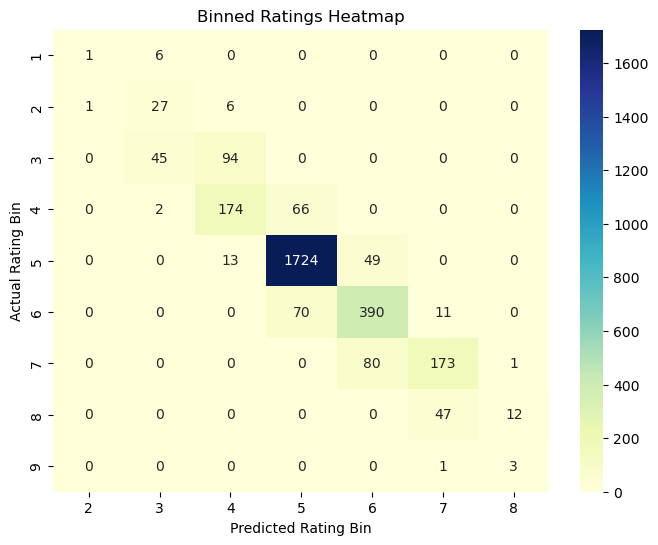

In [67]:
bins = np.arange(0, 11, 1)  # If ratings are from 0 to 10
y_test_binned = pd.cut(ytest, bins, labels=bins[:-1])
y_pred_binned = pd.cut(ypred, bins, labels=bins[:-1])

conf_mat = pd.crosstab(y_test_binned, y_pred_binned)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted Rating Bin')
plt.ylabel('Actual Rating Bin')
plt.title('Binned Ratings Heatmap')
plt.show()

<h4>Model Accuracy</h4>

In [68]:
Accuracy=model.score(xtest,ytest)

In [69]:
print(f"The model achieved {Accuracy*100} % accuracy on the test set.")

The model achieved 90.74715057386285 % accuracy on the test set.
